# Exploratory Data Analysis - Retail Store

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# import dataset
data = pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.shape

(9994, 13)

In [5]:
# Checking for null-values
data.isnull().any()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [6]:
# no. of unique values 
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [7]:
# data type of each column
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:
# Check for duplicate values
data.duplicated().sum()

17

In [9]:
# Dropping duplicate values
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(9977, 13)

In [11]:
# correlation between columns
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


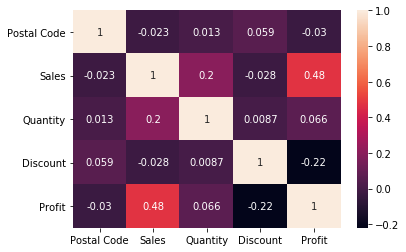

In [12]:
# Plotting heatmap for corelated columns
sns.heatmap(data.corr(),annot=True)

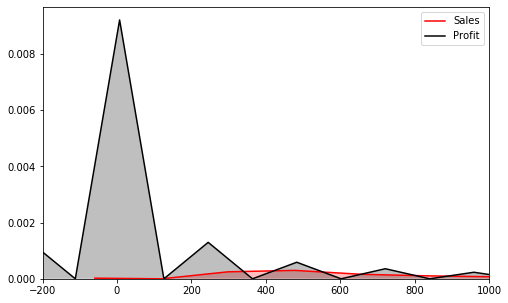

In [13]:
# Plotting probability distribution of sales and profit
plt.figure(figsize=(8,5))
sns.kdeplot(data['Sales'],color='red',label='Sales',shade=True,bw=20)
sns.kdeplot(data['Profit'],color='Black',label='Profit',shade=True,bw=20)
plt.xlim([-200,1000])
plt.legend()

In [98]:
# To find out  Sales and Profit generated by the Superstore

print('Sales:' ,data['Sales'].sum())
print('Profit:' ,data['Profit'].sum())

Sales: 2296195.5903
Profit: 286241.4226


### Profit is more than that of sale but there are some areas where profit could be increased.

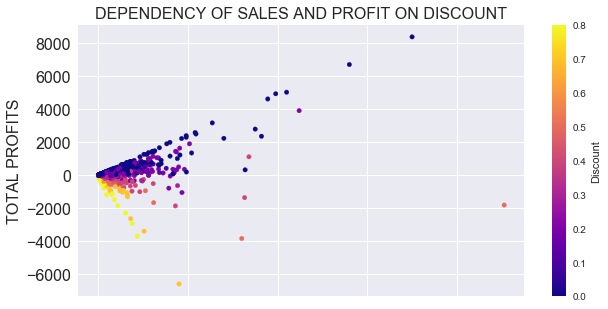

In [85]:
plt.style.use('seaborn')
data.plot(kind = 'scatter', figsize = (10,5) , x = 'Sales', y='Profit', c = 'Discount' , s = 20 , fontsize = 16 , colormap = 'plasma')
plt.ylabel('TOTAL PROFITS', fontsize = 16)
plt.title('DEPENDENCY OF SALES AND PROFIT ON DISCOUNT' , fontsize = 16)
plt.show()

#### The above Scatterplot depicts that less the discount more is the profit. Discount is affecting profit to a certain extent and after that point Profits has no relation with Discount

## Count plot of all features

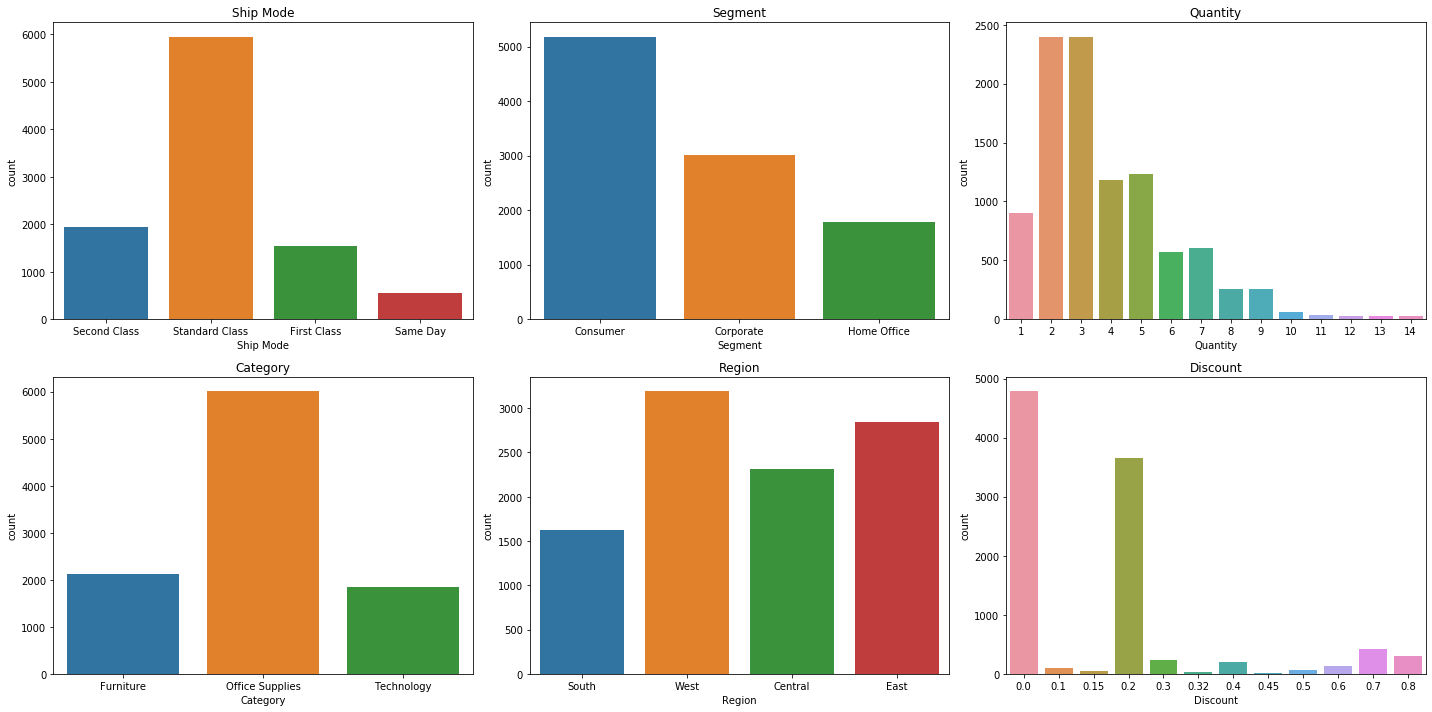

In [29]:
fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(20,10));

sns.countplot(data['Ship Mode'],ax=axs[0][0])
sns.countplot(data['Segment'],ax=axs[0][1])
sns.countplot(data['Quantity'],ax=axs[0][2])
sns.countplot(data['Category'],ax=axs[1][0])
sns.countplot(data['Region'],ax=axs[1][1])
sns.countplot(data['Discount'],ax=axs[1][2])

axs[0][0].set_title('Ship Mode')
axs[0][1].set_title('Segment')
axs[0][2].set_title('Quantity')
axs[1][0].set_title('Category')
axs[1][1].set_title('Region')
axs[1][2].set_title('Discount')


plt.tight_layout()

Text(0.5, 1.0, 'Sub-Category')

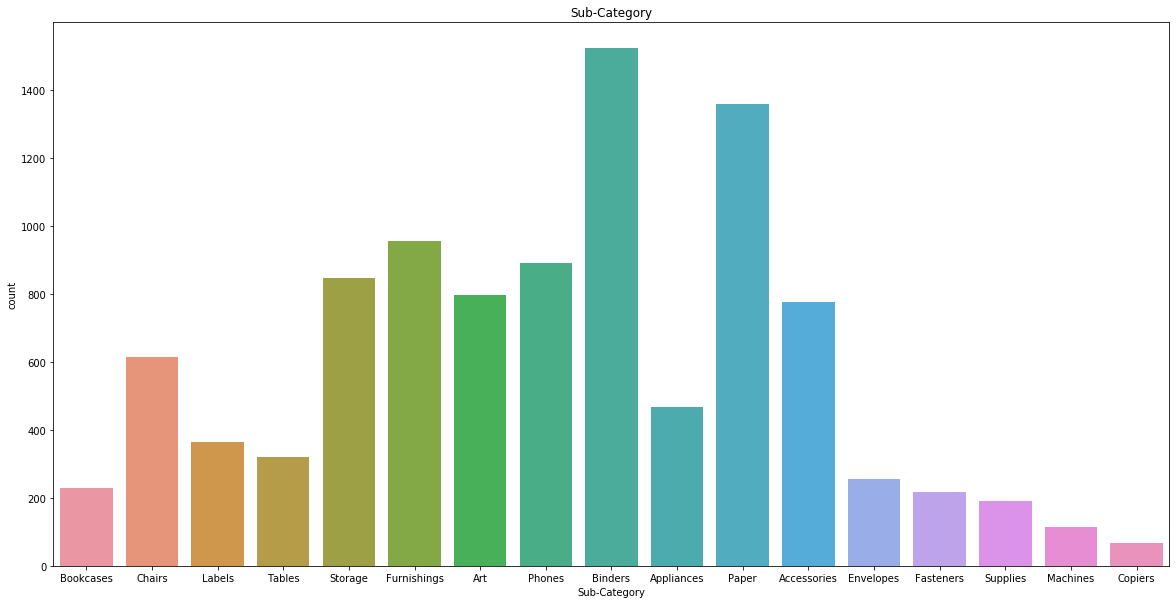

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(data['Sub-Category'])
plt.title('Sub-Category')

Text(0.5, 1.0, 'State')

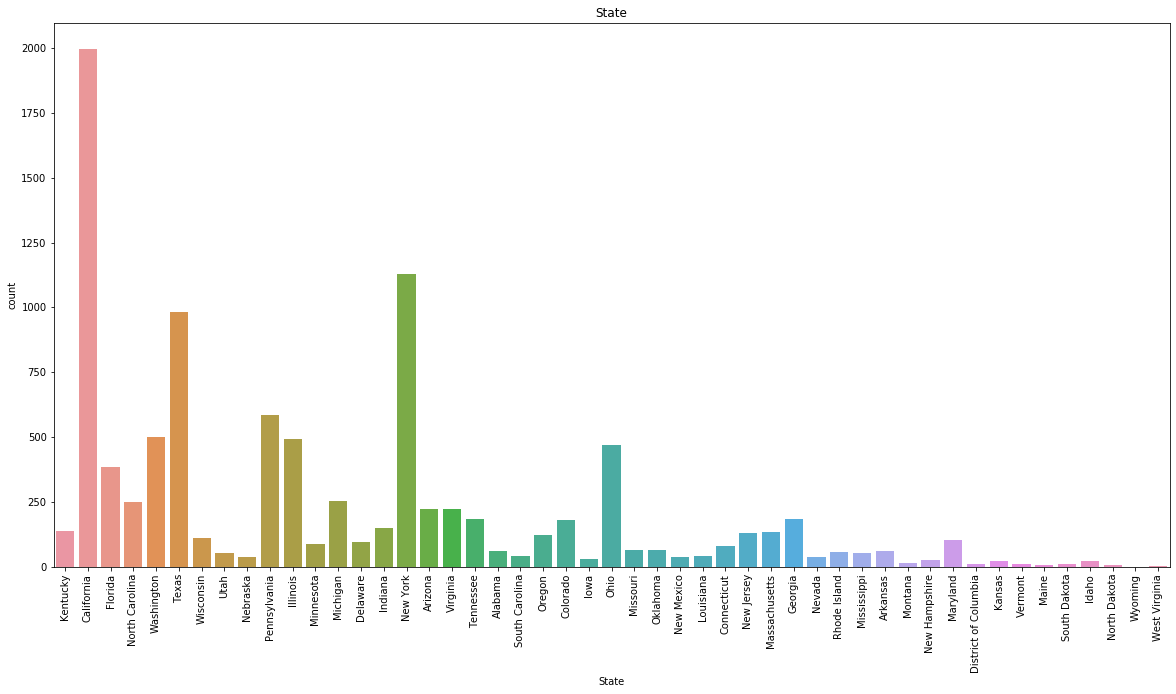

In [33]:
plt.figure(figsize=(20,10))
sns.countplot(data['State'])
plt.xticks(rotation=90)
plt.title('State')

### Distribution of the data using the plot

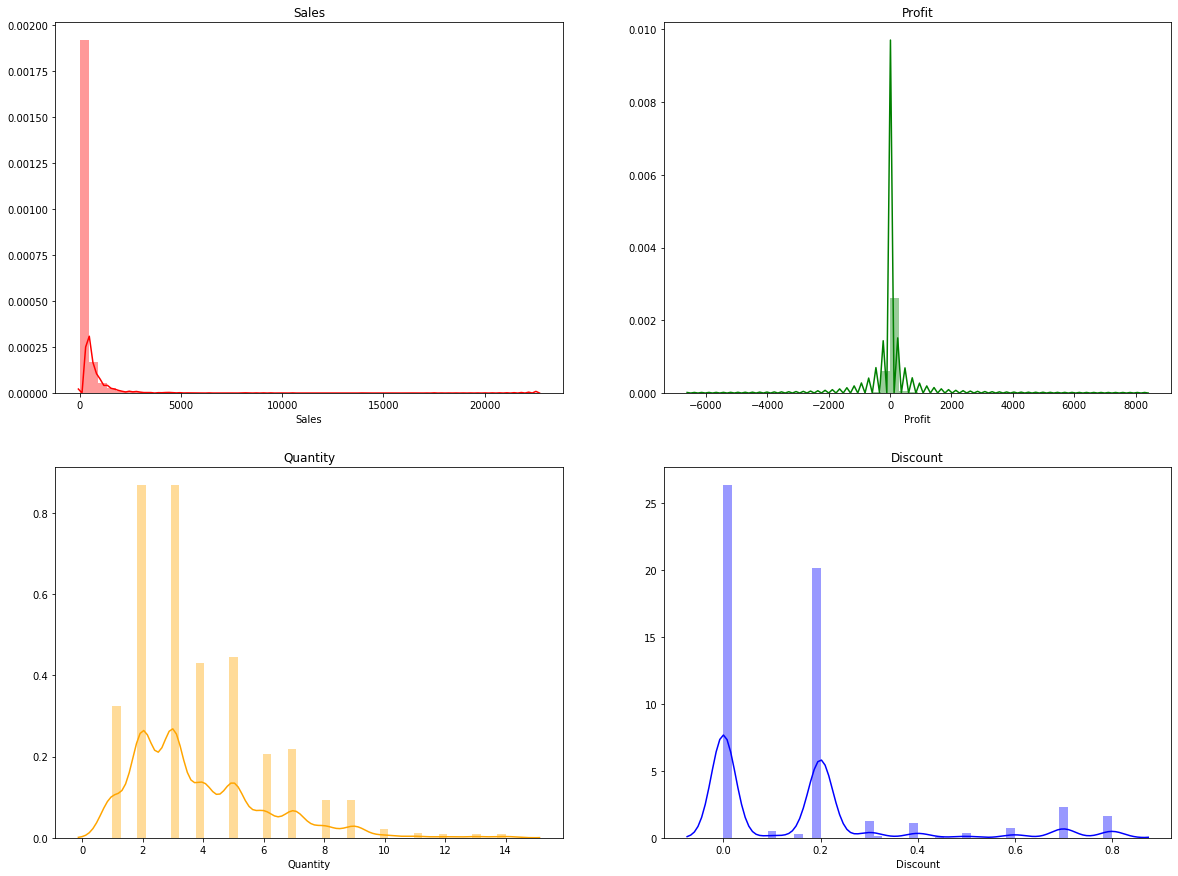

In [52]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (20,15))
sns.distplot(data['Sales'], color = 'red',  ax = axs[0][0])
sns.distplot(data['Profit'], color = 'green',  ax = axs[0][1])
sns.distplot(data['Quantity'], color = 'orange',  ax = axs[1][0])
sns.distplot(data['Discount'], color = 'blue',  ax = axs[1][1])
axs[0][0].set_title('Sales')
axs[0][1].set_title('Profit')
axs[1][0].set_title('Quantity')
axs[1][1].set_title('Discount')
plt.show()

### Deal Analysis

In [65]:
state = data['State'].value_counts()

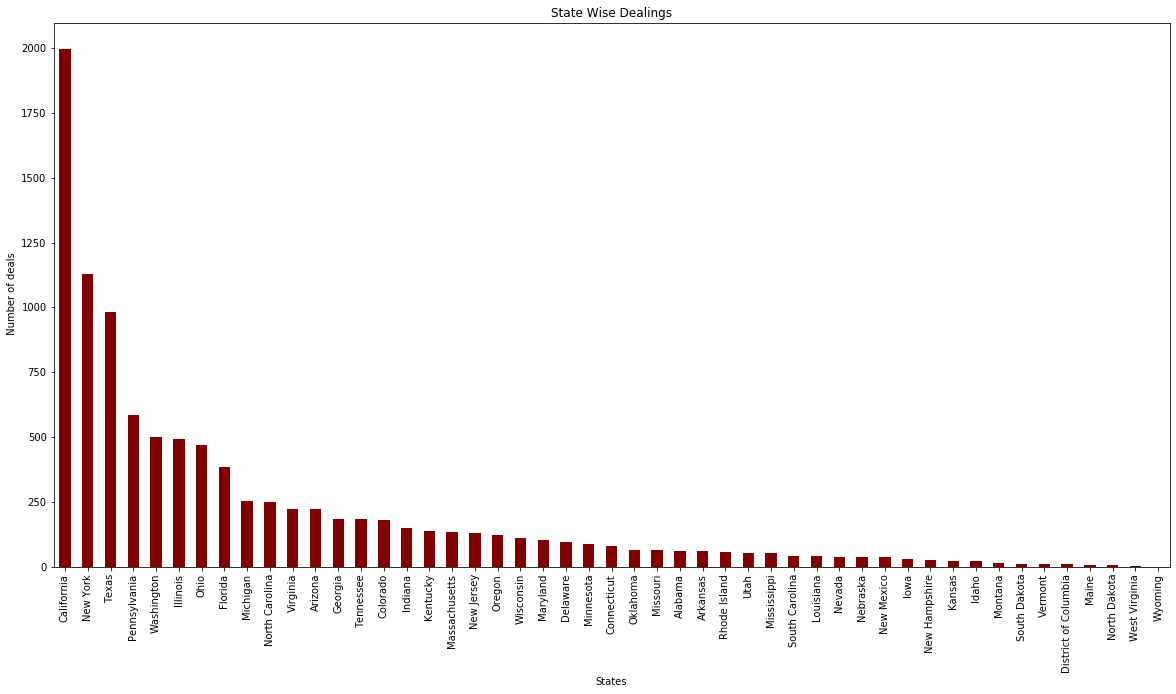

In [68]:
state.plot(kind='bar',figsize=(20,10),color="maroon")
plt.ylabel(' Number of deals')
plt.xlabel('States')

plt.title('State Wise Dealings')
plt.show()

#### States with maximum deals - 1) California 2) New York 3) Texas

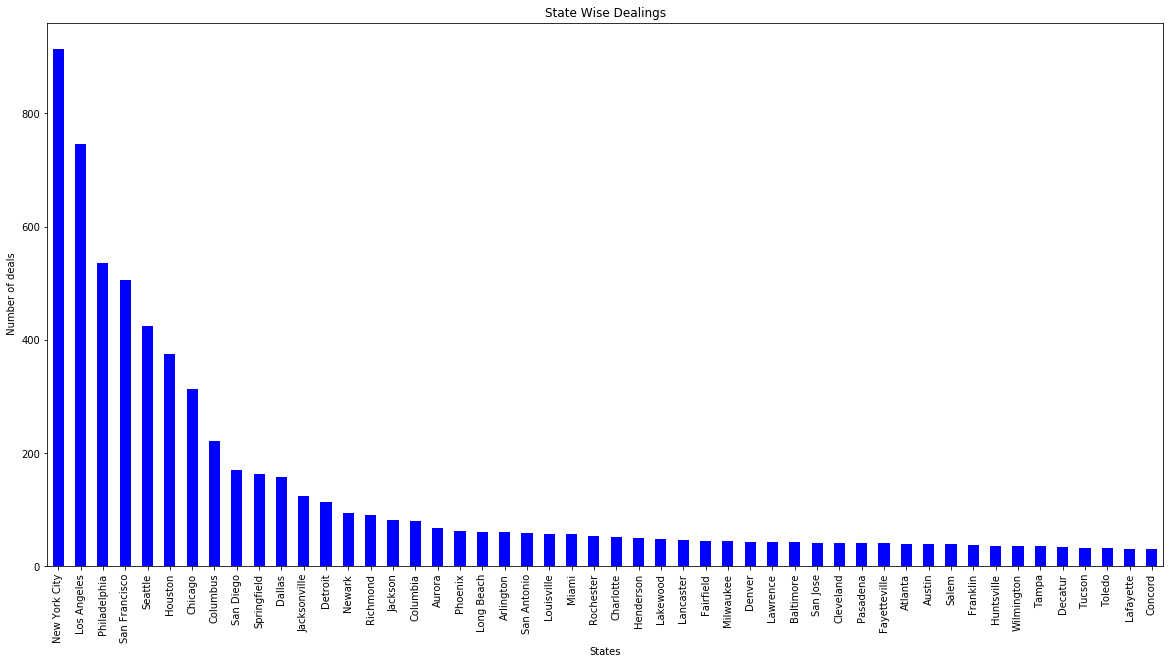

In [73]:
city = data['City'].value_counts()
city = city.head(50)
city.plot(kind='bar',figsize=(20,10),color="blue")
plt.ylabel(' Number of deals')
plt.xlabel('Cities')

plt.title('City Wise Dealings')
plt.show()

#### Cities with maximum deals - 1) New York 2) Los ANgeles 3) Philadelphia

### Customer Analysis

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


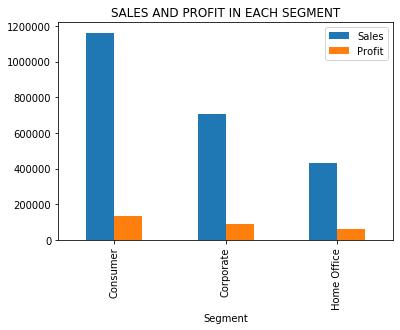

In [75]:
# To check maximum Sales and Profit in each segment

data.groupby('Segment')['Sales','Profit'].sum().plot.bar()
plt.title('SALES AND PROFIT IN EACH SEGMENT')
plt.legend()
plt.show()

#### So the graph presents that *CONSUMER* segment is the one which has maximum buying capacity Also they give maximum profit to Superstore whereas Home Office purchases less and add less profit to business

#### Now we will check Ship Mode Segment wise

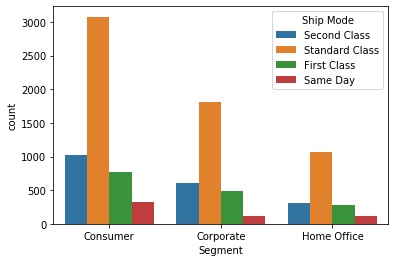

In [77]:
# To check this we will use countplot 

sns.countplot(x='Segment' , hue='Ship Mode' , data=data)
plt.show()

### In each segment most of the transaction has been shipped under Standard Class

In [112]:
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [118]:
shipmode = data.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit']].mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C45070FC8>,
      dtype=object)

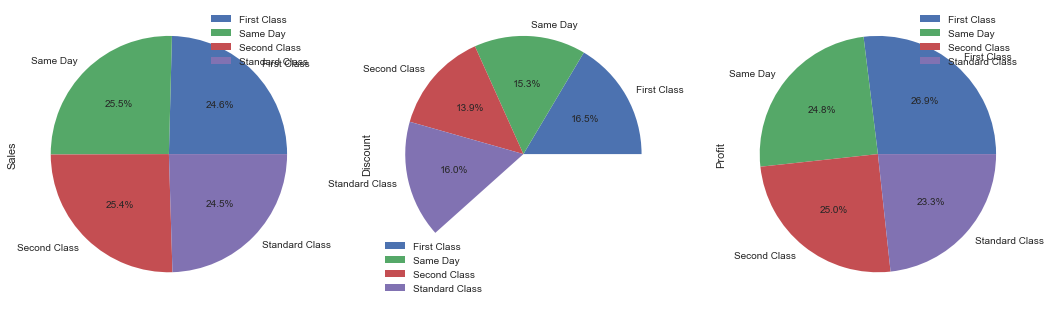

In [119]:
shipmode.plot.pie(subplots=True,
                     figsize=(18, 20), 
                     autopct='%1.1f%%', 
                     labels = shipmode.index)

### Profit and Discount is high in First Class
### Sales is high for Same day ship

### PRODUCT ANALYSIS

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


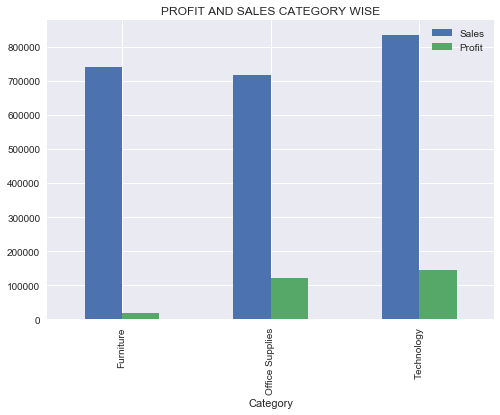

In [90]:
data.groupby('Category')['Sales','Profit'].sum().plot.bar()
plt.title('PROFIT AND SALES CATEGORY WISE')
plt.legend(loc = 1)
plt.show()

In [103]:
category = data.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
category

,Sales,Discount,Profit
Category,,,
Furniture,350.002981,0.174027,8.697740
Office Supplies,119.550107,0.157385,20.353403
Technology,452.709276,0.132323,78.752002


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C431FEFC8>,
      dtype=object)

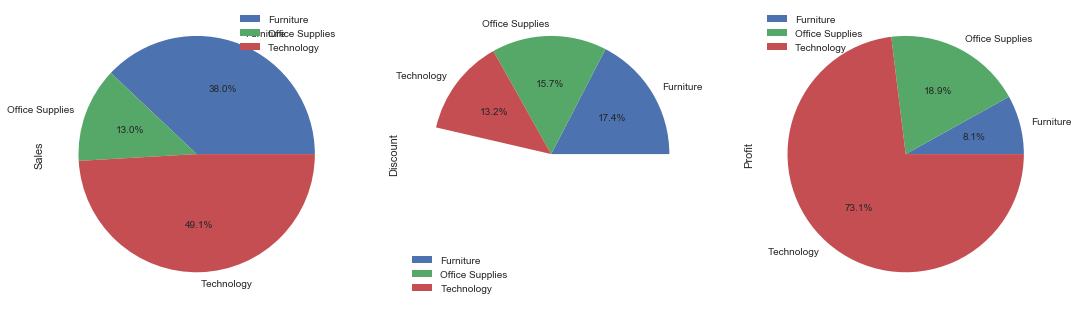

In [104]:
category.plot.pie(subplots=True, 
                     figsize=(18, 20), 
                     autopct='%1.1f%%', 
                     labels = category.index)

#### This Bar Plot shows that *Technology* has given maximum sales subsequently Profit was also maximum.
#### But not following this trend *Furniture* also had sales at great amount following with least amount of profit.

In [105]:
sub_category = data.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()
sub_category.head()

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.096896,0.074969,8.207059
Binders,133.645972,0.372011,19.860710
Bookcases,503.859633,0.211140,-15.230509


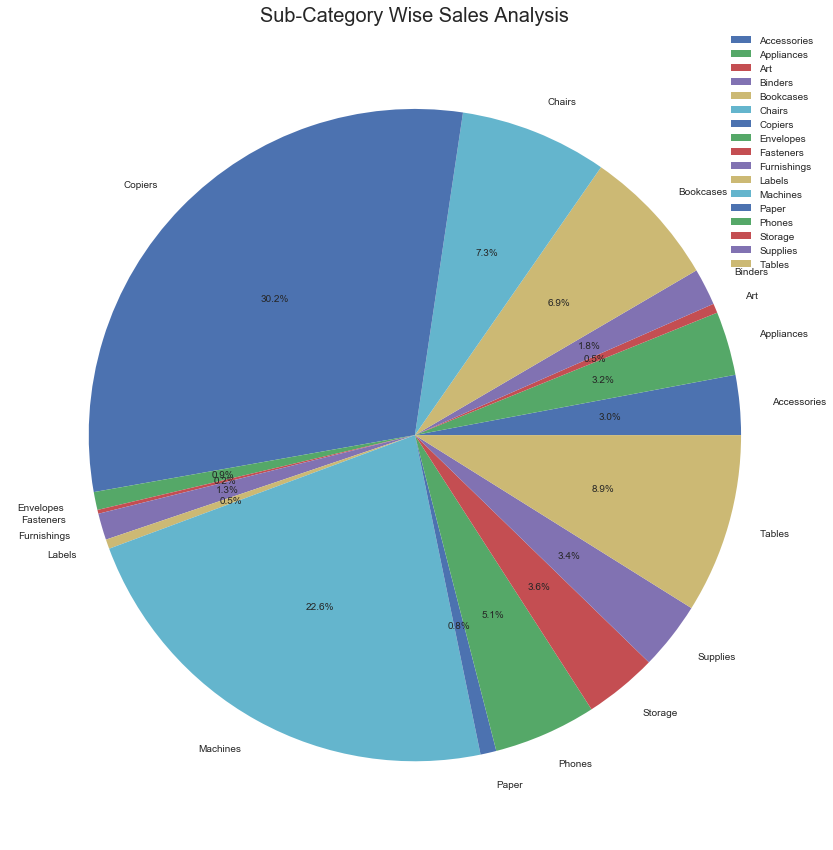

In [106]:
plt.figure(figsize = (15,15))
plt.pie(sub_category['Sales'], labels = sub_category.index, autopct = '%1.1f%%')
plt.title('Sub-Category Wise Sales Analysis', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

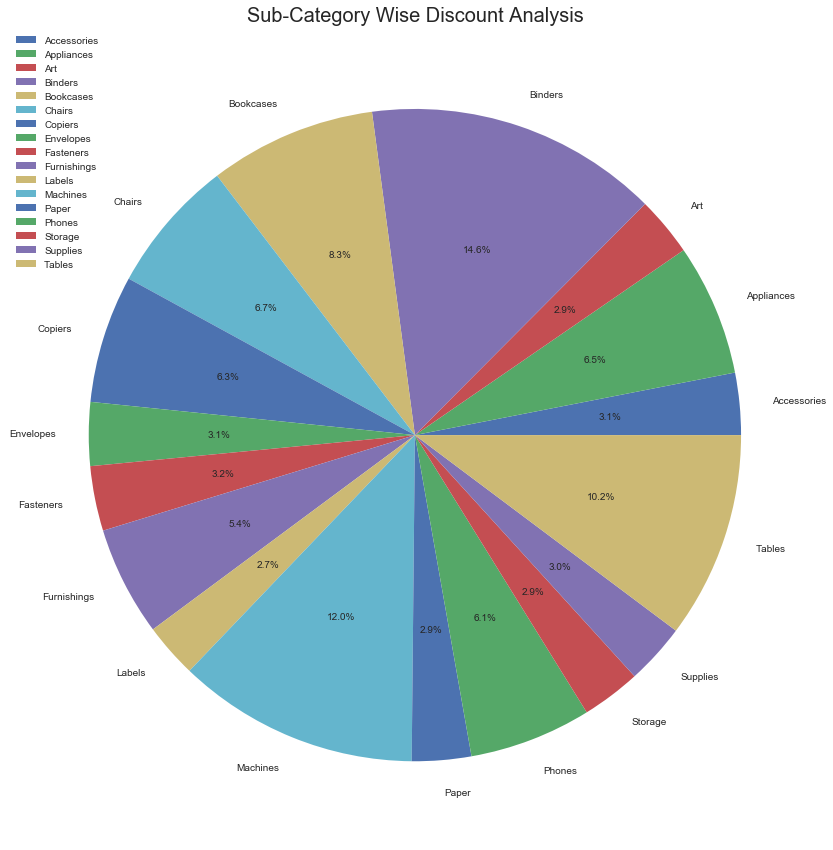

In [108]:
plt.figure(figsize = (15,15))
plt.pie(sub_category['Discount'], labels = sub_category.index, autopct = '%1.1f%%')
plt.title('Sub-Category Wise Discount Analysis', fontsize = 20)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

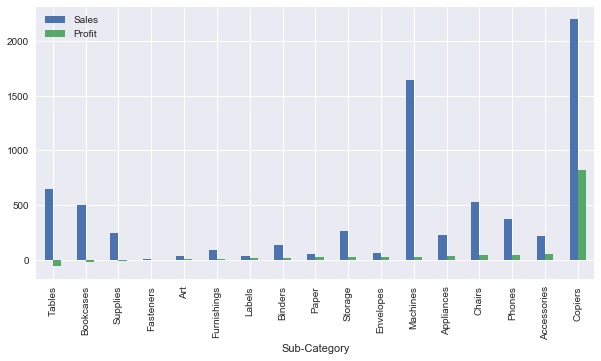

In [109]:
sub_category.sort_values('Profit')[['Sales','Profit']].plot(kind='bar',
                                                              figsize= (10,5),
                                                              label=['Avg Sales Price($)','Profit($)'])

#### We concluded that despite of maximum Discount in Tables and Bookcases the store in incurring losses.
#### Since we are having sales at max and Discount is also given,now we will check Correlation in between the two.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


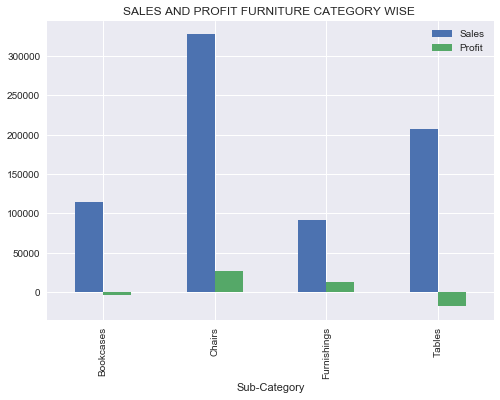

In [91]:
data[data['Category'] == 'Furniture'].groupby('Sub-Category')['Sales','Profit'].sum().plot.bar()
plt.title('SALES AND PROFIT FURNITURE CATEGORY WISE ')
plt.legend(loc = 1)
plt.show()

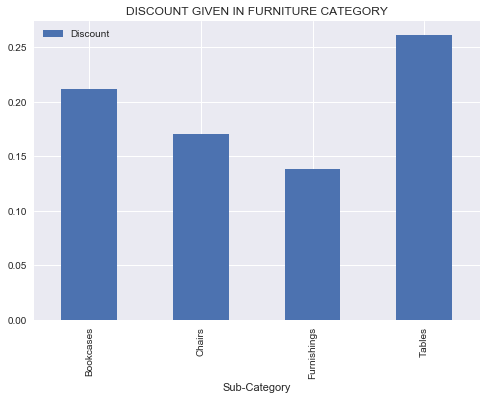

In [111]:
# To check the probable reason of loss 

data[data['Category'] == 'Furniture'].groupby('Sub-Category')['Discount'].mean().plot.bar()
plt.title('DISCOUNT GIVEN IN FURNITURE CATEGORY')
plt.legend(loc = 0)
plt.show()


#### From above Heatmap we concluded there is a Negative correlation in between Profit and Discount whereas a Positive correlation between Profit and Sales

### TOP PRODUCTS

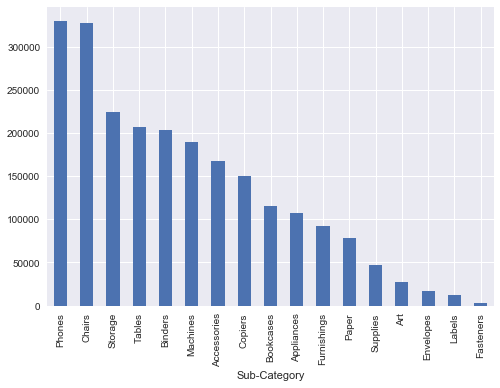

In [94]:
# Now we will check the Top Products Sold

data.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).plot.bar()
plt.show()

#### With this we concluded that Phones,Chairs ,Storage,Tables and Binders are being sold at max consecutively. Whereas Fasteners,Labels and Envelopes were sold the least

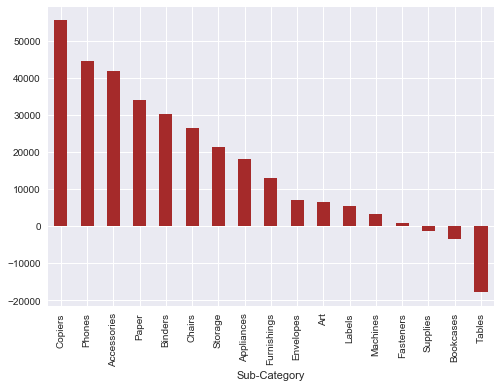

In [96]:
#To check the profit earned in all the  Sub-Categories

data.groupby('Sub-Category')['Profit'].sum().sort_values(ascending = False).plot.bar(color = 'brown')
plt.show()

Here we saw Copiers ,Phones,Accessories are top profit giving products to the store. whereas Store is incurring losses due to Tables ,Bookcases and suppliers.

### REGIONAL ANALYSIS

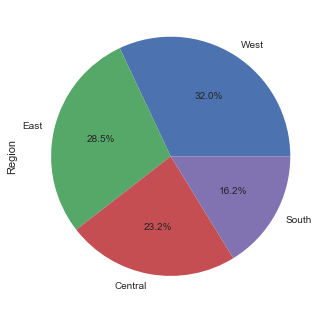

In [100]:
# To check maximum transactions made regionwise

data.Region.value_counts().plot.pie(autopct="%.1f%%")
plt.show()

In [120]:
region = data.groupby(['Region'])[['Sales', 'Discount', 'Profit']].mean()
region

,Sales,Discount,Profit
Region,,,
Central,215.947759,0.240250,17.100421
East,238.465798,0.145343,32.163905
South,241.803645,0.147253,28.857673
West,227.139254,0.109615,33.927281


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C4518A308>,
      dtype=object)

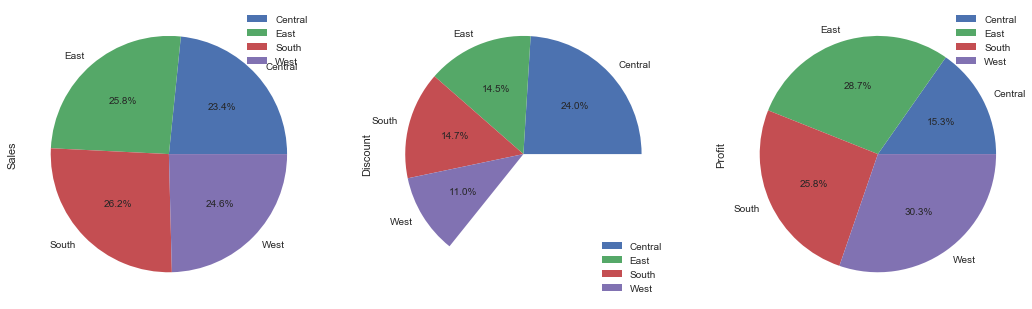

In [121]:
region.plot.pie(subplots=True, 
                   figsize=(18, 20), 
                   autopct='%1.1f%%',
                   labels = region.index)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<function matplotlib.pyplot.show(*args, **kw)>

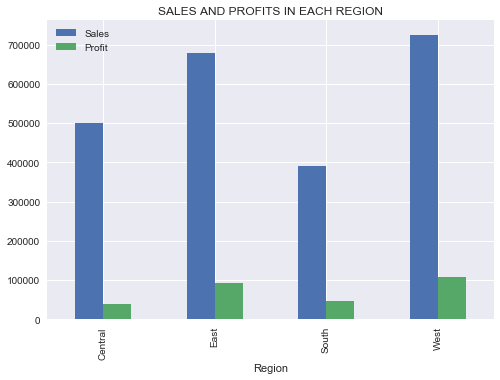

In [102]:
data.groupby('Region')['Sales','Profit'].sum().plot.bar()
plt.title('SALES AND PROFITS IN EACH REGION')
plt.legend()
plt.show

### OBSERVATIONS:

1) MAXIMUM SALES,PROFITS, TRANSACTIONS were made in WEST REGION

2) MAXIMUM SALES AND PROFIT in CONSUMER SEGMENT

3) MAXIMUM TRANSACTIONS were shipped in STANDARD CLASS irrespective of SEGMENT

4) LEAST PROFIT is incurred in FURNITURE CATEGORY irrespective of good amount of Sales

5) In Sub-Category FURNITURE, TABLES and BOOKCASES are INCURRING LOSSES which is effecting the TOTAL PROFIT of Furniture Category

8) HIGH DISCOUNT is being offered in TABLES and BOOKCASES which is somewhere the probable reason of losses.

9) POSITIVE CORRELATION: Profit and Sales; NEGATIVE CORRELATION:Profit and Discount

### CONCLUSION:

From Above Observation we conclude that FURNITURE category is the "weak area"  we need to work upon. 

So we need to REDUCE the DISCOUNT in order to INCREASE the PROFIT or increase the cost of products.